# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [72]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [73]:
credit=pd.read_csv('GermanCredit.csv')
print("The dataset is {} credit record".format(len(credit)))

credit.head()

The dataset is 1000 credit record


,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [74]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [75]:
credit['Class'].describe()

count     1000
unique       2
top       Good
freq       700
Name: Class, dtype: object

In [76]:
features = credit.drop('Class', 1)
print(features.info())

risk = credit['Class'].map({'Bad':0, 'Good':1})

risk.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   CheckingAccountStatus.lt.0              1000 non-null   int64
 10  CheckingAccountStatus.0.to.200          1000 non-null   int64
 11  CheckingAccountSta

count    1000.000000
mean        0.700000
std         0.458487
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Class, dtype: float64

In [77]:
import numpy as np

X_train,X_test,Y_train,Y_test = train_test_split(features,risk,test_size=0.20,random_state = 30)

clf = DecisionTreeClassifier( random_state = 100)

params = {
    'criterion': ['gini', 'enthropy'],
    'max_depth': range(3,7),
    #'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    #'min_weight_fraction_leaf': np.arange(0,1,0.5),
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': range(5,10),
    #'min_impurity_decrease': np.arange(0,1,0.5),
    #'ccp_alpha': np.arange(0,1,0.5)
}

grid = GridSearchCV(clf,param_grid=params,cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,Y_train)

grid.best_params_, grid.best_estimator_, grid.best_score_

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


({'criterion': 'gini',
  'max_depth': 4,
  'max_features': 'log2',
  'max_leaf_nodes': 9,
  'min_samples_leaf': 2},
 DecisionTreeClassifier(max_depth=4, max_features='log2', max_leaf_nodes=9,
                        min_samples_leaf=2, random_state=100),
 0.72375)

In [78]:
optimized_decision_tree = DecisionTreeClassifier(max_depth=4, max_features='log2', max_leaf_nodes=9,
                        min_samples_leaf=2, random_state=100)
optimized_decision_tree = optimized_decision_tree.fit(X_train,Y_train)

y_pred = optimized_decision_tree.predict(X_test)
print(classification_report(Y_test, y_pred))
dt_f1 = f1_score(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.50      0.08      0.14        64
           1       0.69      0.96      0.80       136

    accuracy                           0.68       200
   macro avg       0.59      0.52      0.47       200
weighted avg       0.63      0.68      0.59       200



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [79]:
! pip install dtreeviz
! sudo apt -yq install graphviz

Defaulting to user installation because normal site-packages is not writeable
sudo: unable to resolve host sagemaker-jumpstart-d-ml-t3-medium-587ae20b053ee75476e1e39e9fae
Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

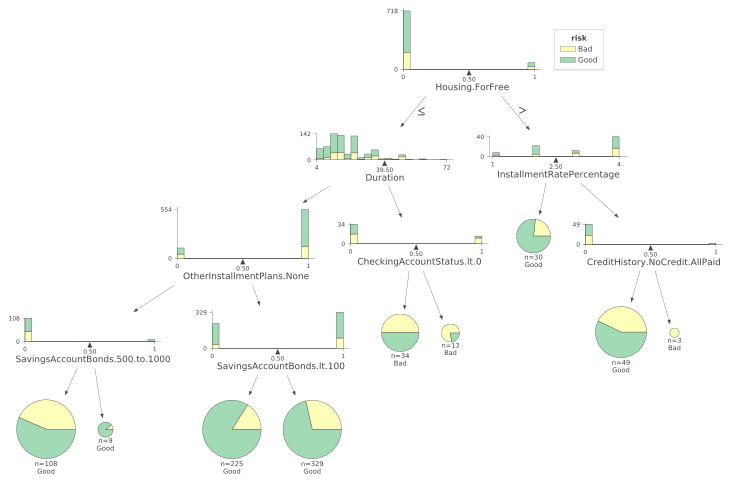

In [80]:
from dtreeviz.trees import *

feature_names=features.columns
viz = dtreeviz(optimized_decision_tree, X_train, Y_train, target_name='risk',
               feature_names=feature_names, class_names=["Bad", "Good"] )
viz

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
import numpy as np

clf = RandomForestClassifier( class_weight='balanced_subsample', max_depth=6,
                        max_features='log2', max_leaf_nodes=9, n_estimators=125, max_samples=121,
                        random_state=100, warm_start=True, bootstrap=True, oob_score=True, n_jobs=-1)

params = {
    #'n_estimators': range(123, 128, 1),
    #'max_depth': range(5,7),
    #'min_samples_split': range(1,4),
    #'min_samples_leaf': range(1,4),
    #'min_weight_fraction_leaf': np.arange(0,1,0.5),
    'max_features': ['sqrt', 'log2'],
    #'max_leaf_nodes': range(5,10),
    #'class_weight': ['balanced', 'balanced_subsample'],
    #'warm_start': [True,False],
    #'oob_score':  [True,False]
    'max_samples': range(115, 125, 1)
    
    #'min_impurity_decrease': np.arange(0,1,0.5),
    #'ccp_alpha': np.arange(0,1,0.5)
}

grid = GridSearchCV(clf,param_grid=params,cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,Y_train)

grid.best_params_, grid.best_estimator_, grid.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


({'max_features': 'log2', 'max_samples': 121},
 RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                        max_features='log2', max_leaf_nodes=9, max_samples=121,
                        n_estimators=125, n_jobs=-1, oob_score=True,
                        random_state=100, warm_start=True),
 0.7587499999999998)

In [83]:
optimized_clf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                        max_features='log2', max_leaf_nodes=9, max_samples=121,
                        n_estimators=125, n_jobs=-1, oob_score=True,
                        random_state=100, warm_start=True)
optimized_clf = optimized_clf.fit(X_train,Y_train)

y_pred = optimized_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
rf_f1 = f1_score(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.59      0.58      0.58        64
           1       0.80      0.81      0.81       136

    accuracy                           0.73       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.73      0.73      0.73       200



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

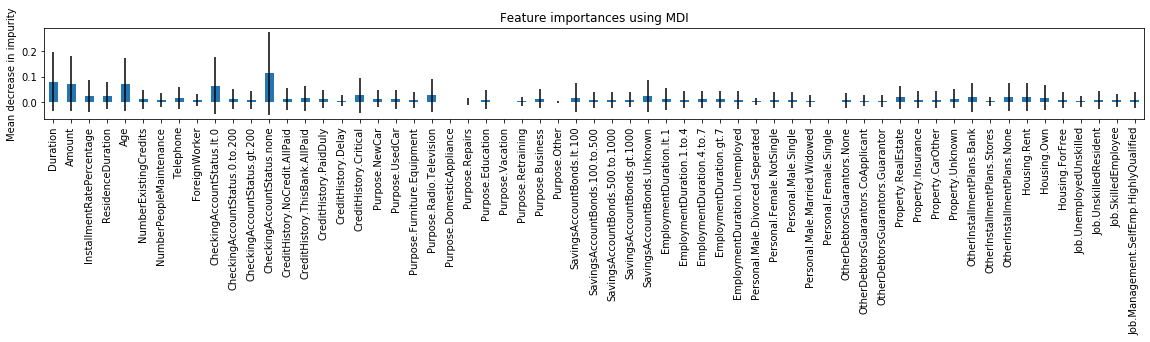

In [84]:
importances = optimized_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in optimized_clf.estimators_], axis=0)

import pandas as pd
forest_importances = pd.Series(importances, index=features.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
fig.savefig('feature-importance-mdi.svg', dpi=100)
plt.show()

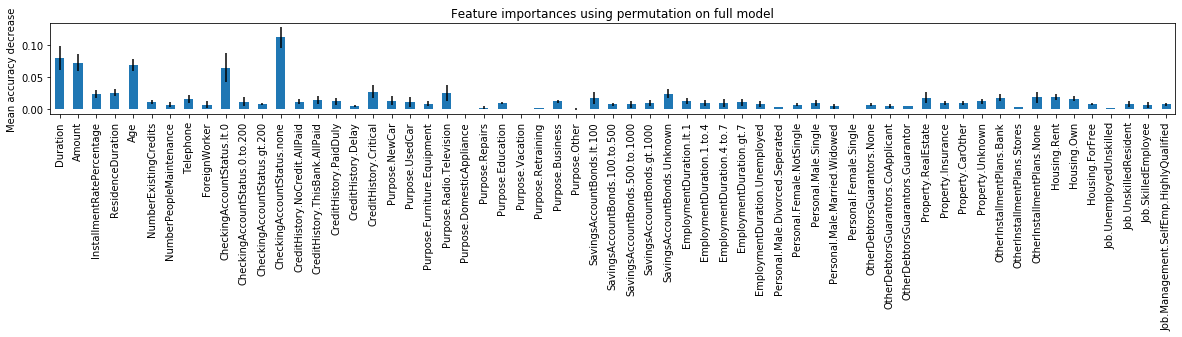

In [85]:
from sklearn.inspection import permutation_importance

result = permutation_importance(optimized_clf, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
fig.savefig('feature-importance-permutation.svg', dpi=100)
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [86]:
! pip install pdpbox

Defaulting to user installation because normal site-packages is not writeable


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

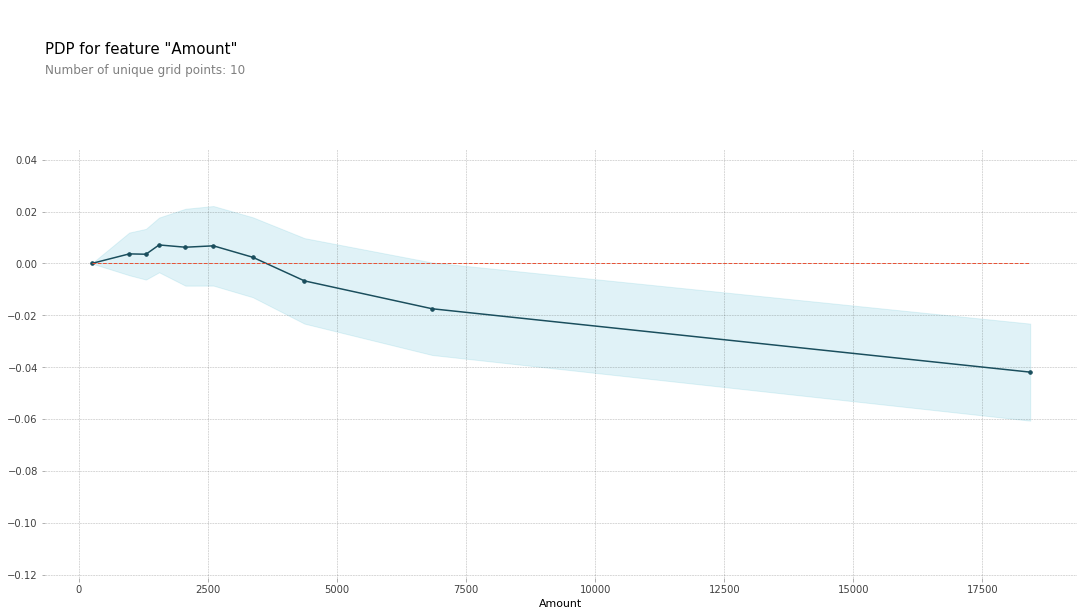

In [87]:
from pdpbox import pdp

pdp_amount = pdp.pdp_isolate(
    model=optimized_clf, dataset=features, model_features=features.columns, feature='Amount'
)

fig, axes = pdp.pdp_plot(pdp_amount, 'Amount')
fig.set_size_inches(18.5, 10.5)

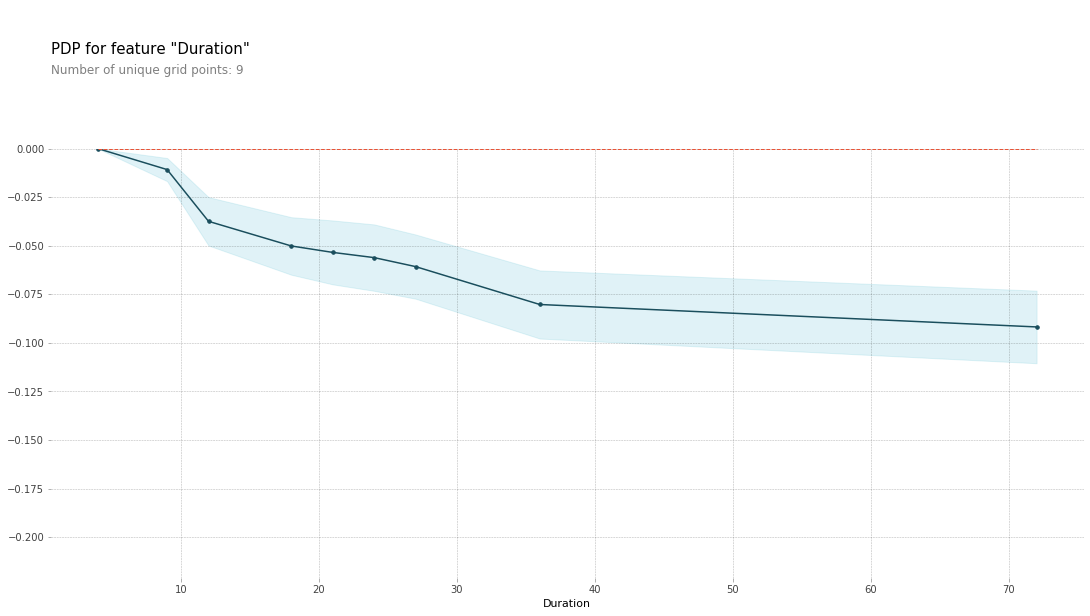

In [88]:
pdp_duration = pdp.pdp_isolate(
    model=optimized_clf, dataset=features, model_features=features.columns, feature='Duration'
)

fig, axes = pdp.pdp_plot(pdp_duration, 'Duration')
fig.set_size_inches(18.5, 10.5)

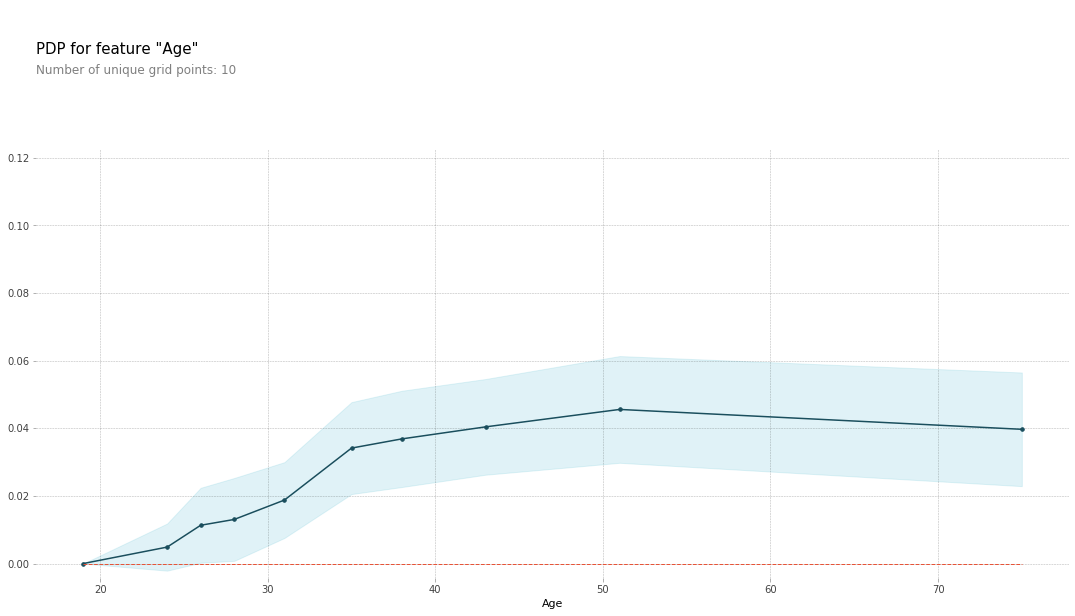

In [89]:
pdp_age = pdp.pdp_isolate(
    model=optimized_clf, dataset=features, model_features=features.columns, feature='Age'
)

fig, axes = pdp.pdp_plot(pdp_age, 'Age')
fig.set_size_inches(18.5, 10.5)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [90]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [91]:
! pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [92]:
! pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [93]:
# xgboost
import numpy as np
from xgboost import XGBRFClassifier

clf = XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                 interaction_constraints='', learning_rate=0.001,
                 max_delta_step=0, max_depth=7, min_child_weight=1, missing=np.nan,
                 monotone_constraints='()', n_estimators=98, n_jobs=-1,
                 num_parallel_tree=124, objective='binary:logistic',
                 random_state=100, reg_alpha=0, scale_pos_weight=1,
                 tree_method='exact', validate_parameters=1, verbosity=3)

params = {
    'n_estimators': range(97, 99, 1),
    'max_depth': range(6,8),
    #'learning_rate': np.arange(0,0.00,0.001),
    #'gamma': np.arange(0,2,0.1),
}

grid = GridSearchCV(clf,param_grid=params,cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,Y_train)

grid.best_params_, grid.best_estimator_, grid.best_score_

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=7
[16:55:33] INFO: ../src/tree/upd

({'max_depth': 7, 'n_estimators': 98},
 XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                 interaction_constraints='', learning_rate=0.001,
                 max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
                 monotone_constraints='()', n_estimators=98, n_jobs=-1,
                 num_parallel_tree=124, objective='binary:logistic',
                 random_state=100, reg_alpha=0, scale_pos_weight=1,
                 tree_method='exact', validate_parameters=1, verbosity=3),
 0.7625)

In [94]:
xgboost_clf = XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                 interaction_constraints='', learning_rate=0.001,
                 max_delta_step=0, max_depth=7, min_child_weight=1, missing=np.nan,
                 monotone_constraints='()', n_estimators=98, n_jobs=-1,
                 num_parallel_tree=124, objective='binary:logistic',
                 random_state=100, reg_alpha=0, scale_pos_weight=1,
                 tree_method='exact', validate_parameters=1, verbosity=1)
xgboost_clf = xgboost_clf.fit(X_train,Y_train)

y_pred = xgboost_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
xgboost_f1 = f1_score(Y_test, y_pred)

[16:55:33] ======== Monitor: Learner ========
[16:55:33] ======== Monitor: GBTree ========
[16:55:33] ======== Monitor: TreePruner ========
[16:55:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.62      0.39      0.48        64
           1       0.76      0.89      0.82       136

    accuracy                           0.73       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.71      0.73      0.71       200



In [95]:
# catboost
import numpy as np
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=3,
                        learning_rate=0.24,
                        l2_leaf_reg= 2.61,
                        depth=7, random_seed=30)

params = {
    'depth': range(6,8,1),
    'iterations': range(2,4,1),
    'learning_rate': np.arange(0.23, 0.25, 0.01),
    'l2_leaf_reg': np.arange(2.6, 2.7, .01)
}

grid = GridSearchCV(clf,param_grid=params,cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,Y_train)

grid.best_params_, grid.best_estimator_, grid.best_score_

Fitting 10 folds for each of 88 candidates, totalling 880 fits
0:	learn: 0.6155619	total: 2.9ms	remaining: 5.8ms
1:	learn: 0.5521654	total: 5.46ms	remaining: 2.73ms
2:	learn: 0.5090561	total: 7.85ms	remaining: 0us


({'depth': 7,
  'iterations': 3,
  'l2_leaf_reg': 2.61,
  'learning_rate': 0.24000000000000002},
 0.74)

In [96]:
catboost_clf = CatBoostClassifier(iterations=3,
                        learning_rate=0.24,
                        l2_leaf_reg= 2.61,
                        depth=7, random_seed=30)
catboost_clf = catboost_clf.fit(X_train,Y_train)

y_pred = catboost_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
catboost_f1 = f1_score(Y_test, y_pred)

0:	learn: 0.6155619	total: 2.72ms	remaining: 5.45ms
1:	learn: 0.5521654	total: 5.14ms	remaining: 2.57ms
2:	learn: 0.5090561	total: 7.89ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.50      0.23      0.32        64
           1       0.71      0.89      0.79       136

    accuracy                           0.68       200
   macro avg       0.61      0.56      0.55       200
weighted avg       0.64      0.68      0.64       200



In [97]:
#lgbm
import numpy as np
from lightgbm import LGBMClassifier

clf = LGBMClassifier(learning_rate=0.3410000000000002, max_depth=6, random_seed=30,
                subsample_for_bin=720)

params = {
    #'boosting_type': ['gbdt','dart','gross','rf']
    'subsample_for_bin': range(700,750, 1)
    #'n_estimators': range(90,110,1)
    #'max_depth': range(5,7,1),
    #'learning_rate': np.arange(0.1,0.5,0.001),
}

grid = GridSearchCV(clf,param_grid=params,cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,Y_train)

grid.best_params_, grid.best_estimator_, grid.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


({'subsample_for_bin': 720},
 LGBMClassifier(learning_rate=0.3410000000000002, max_depth=6, random_seed=30,
                subsample_for_bin=720),
 0.7612499999999999)

In [98]:
lgbm_clf = LGBMClassifier(learning_rate=0.3410000000000002, max_depth=6, random_seed=30,
                subsample_for_bin=720)
lgbm_clf = lgbm_clf.fit(X_train,Y_train)

y_pred = lgbm_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
lgbm_f1 = f1_score(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.56      0.48      0.52        64
           1       0.77      0.82      0.80       136

    accuracy                           0.71       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.71      0.71      0.71       200



In [104]:
d = [['decission tree', dt_f1], ['random forest', rf_f1], ['xgboost', xgboost_f1], ['catboost', catboost_f1], ['lgbm', lgbm_f1]]
df = pd.DataFrame(data=d, columns = ['', 'F1'])
df

,,F1
0,decission tree,0.803681
1,random forest,0.805861
2,xgboost,0.817568
3,catboost,0.790850
4,lgbm,0.797153
